In [1]:
'''This Notebook generates Figure 3a-c for the MIST manuscript'''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
proj_dir = "data/"
data_names = ["MouseWT", "MouseAD", "Melanoma", "Prostate"]

In [3]:
slide_perfs = []
for dn in data_names:
    fn = "%s%s/performance/slide_level_results.csv" %(proj_dir, dn)
    df = pd.read_csv(fn)
    df["data"] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)
slide_perfs.iloc[:4,]

,Unnamed: 0,RMSE,MAPE,SNR,PCC,ModelName,hoMR,impMR,redMR,cvFold,data
0,0,0.948280,0.111083,3.299106,0.721820,MIST,0.423434,0.000156,0.423277,0,MouseWT
1,0,0.993838,0.114456,3.258894,0.697107,mcImpute,0.423434,0.000646,0.422788,0,MouseWT
2,0,1.114111,0.120249,2.932136,0.711622,MAGIC,0.423434,0.000000,0.423434,0,MouseWT
3,0,1.634977,0.166409,2.407442,0.593411,spKNN,0.423434,0.009947,0.413487,0,MouseWT


## Figure 3 A, B

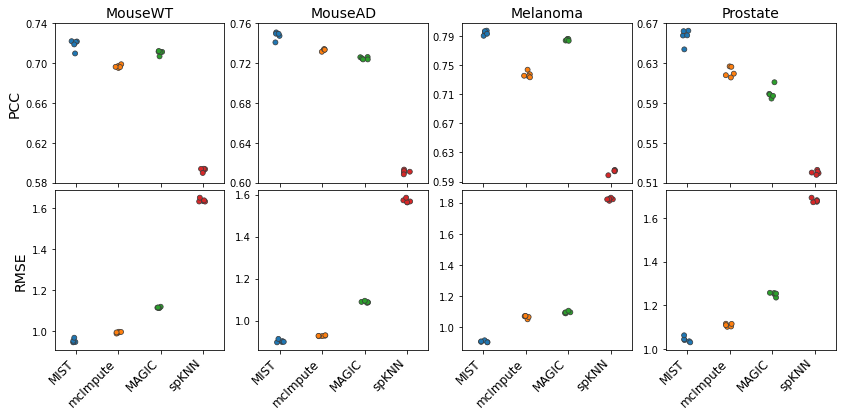

In [4]:
orders = ["MIST", "mcImpute", "MAGIC", "spKNN"]
metrics = ["PCC","RMSE"]
data_names = ["MouseWT", "MouseAD", "Melanoma", "Prostate"]
f1, axs1= plt.subplots(nrows=2, ncols=len(data_names), figsize=(14, 6), sharey=False, sharex="col")

for i in range(len(data_names)):
    dn = data_names[i]
    df = slide_perfs.loc[slide_perfs.data==dn,:]
    df = df.loc[df.ModelName.isin(orders),:]
    
    for j in range(2):
        metric = metrics[j]
        #sns.boxplot(data=df, x="ModelName", y=metric, order=orders,ax=axs1[j][i], linewidth=0.75)
        sns.stripplot(data=df, x="ModelName", y=metric, order=orders,ax=axs1[j][i], linewidth=0.75)

        if j != 1:
            axs1[j][i].set_xlabel("")
            axs1[j][i].set_xticks([])
            axs1[j][i].set_yticks(np.round(np.arange(df[metric].min()-0.01, df[metric].max()+0.03, 0.04), 2))
        else:
            axs1[j][i].set_xticklabels(orders, rotation=45, ha="right", fontsize=12)
            axs1[j][i].set_xlabel("")

        
        if i > 0:
            axs1[j][i].set_ylabel("")
        else:
            axs1[j][i].set_ylabel(metric, fontsize=14)
            
        if j == 0:
            axs1[j][i].set_title(dn, fontsize=14)
            
    
f1.subplots_adjust(wspace=0.2, hspace=0.05)
#plt.savefig("Figures/Figure3AB.png", dpi=300, bbox_inches="tight")

### Extended 3.1 A. B.

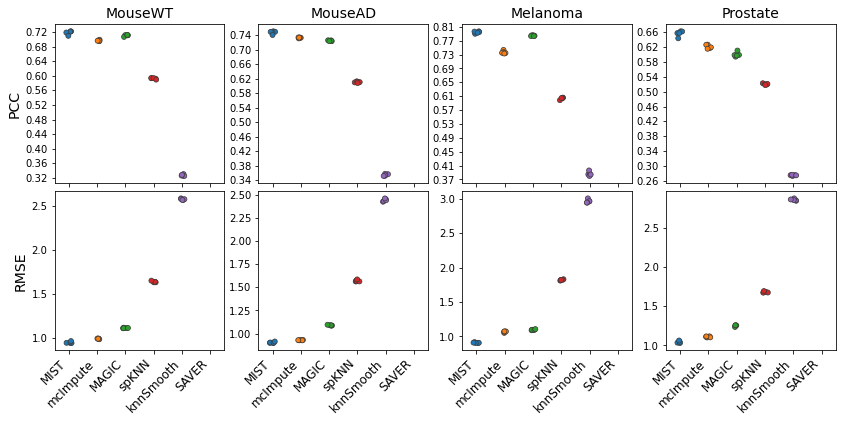

In [5]:
order_supp = ["MIST", "mcImpute", "MAGIC", "spKNN", "knnSmooth", "SAVER"]
metrics = ["PCC","RMSE"]
f1, axs1= plt.subplots(nrows=2, ncols=len(data_names), figsize=(14, 6), sharey=False, sharex="col")

for i in range(len(data_names)):
    dn = data_names[i]
    df = slide_perfs.loc[slide_perfs.data==dn,:]
    df = df.loc[df.ModelName.isin(order_supp),:]
    
    for j in range(2):
        metric = metrics[j]
        sns.stripplot(data=df, x="ModelName", y=metric, order=order_supp,ax=axs1[j][i], linewidth=0.75)

        if j != 1:
            axs1[j][i].set_xlabel("")
            axs1[j][i].set_xticks([])
            axs1[j][i].set_yticks(np.round(np.arange(df[metric].min()-0.01, df[metric].max()+0.03, 0.04), 2))
        else:
            axs1[j][i].set_xticklabels(order_supp, rotation=45, ha="right", fontsize=12)
            axs1[j][i].set_xlabel("")

        
        if i > 0:
            axs1[j][i].set_ylabel("")
        else:
            axs1[j][i].set_ylabel(metric, fontsize=14)
            
        if j == 0:
            axs1[j][i].set_title(dn, fontsize=14)
            
    
f1.subplots_adjust(wspace=0.2, hspace=0.05)
#plt.savefig("Figures/ExtFig3-1AB.png", dpi=300, bbox_inches="tight")

## Gene Level Results

### main figure

<Figure size 432x288 with 0 Axes>

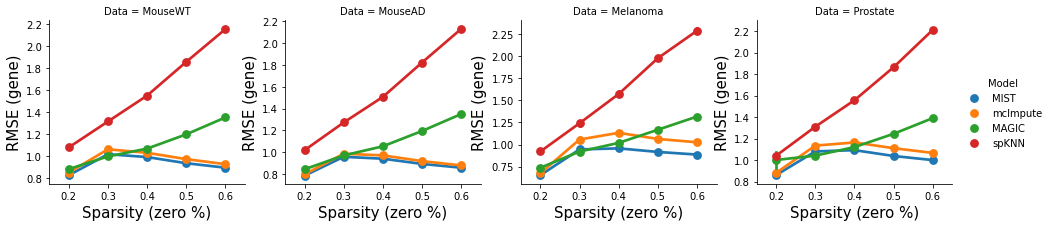

In [7]:
gene_perfs = []
order_main = ["MIST", "mcImpute", "MAGIC", "spKNN"]
for dn in data_names:
    fn = "%s%s/performance/gene_level_results.csv" %(proj_dir, dn)
    df = pd.read_csv(fn, index_col=0)
    df['Data'] = dn
    gene_perfs.append(df)
gene_perfs = pd.concat(gene_perfs)
gene_perfs = gene_perfs.replace("spImpute", "MIST")
gene_perfs['MR'] = gene_perfs['mr'].round(1)
gene_perfs.columns = ["Gene", "RMSE", "PCC", "SNR", "MAPE", "Model", "mr", "cvFold", "Data", "MR"]

f = plt.figure(figsize=(6,4))
gene_main_plot = sns.catplot(data=gene_perfs, x="MR", y = "RMSE", hue="Model",
            linewidth=0.5, hue_order = order_main,kind="point",
           col="Data", sharey=False, height=3, aspect=1.1, saturation=0.8, width=0.8)

for ax in gene_main_plot.axes.flatten():
    ax.set_ylabel('RMSE (gene)', fontsize=15)
    ax.set_xlabel('Sparsity (zero %)', fontsize=15)
#plt.savefig("Figures/Figure3C.png", dpi=300, bbox_inches="tight")

### Extended figure 3.2

<Figure size 576x432 with 0 Axes>

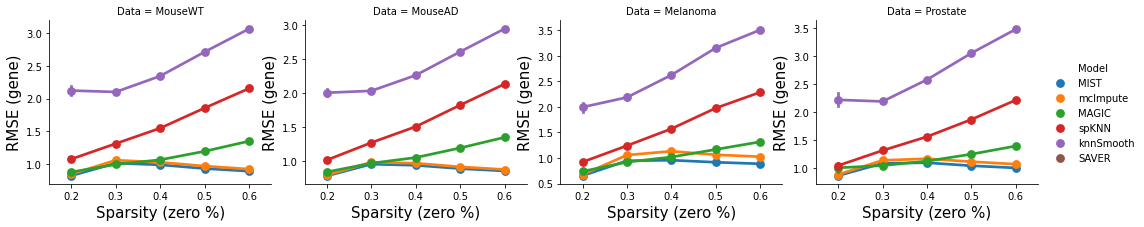

In [8]:
f = plt.figure(figsize=(8,6))
gene_supp_plot = sns.catplot(data=gene_perfs, x="MR", y = "RMSE", hue="Model",
            linewidth=0.5, hue_order = order_supp,kind="point",
           col="Data", sharey=False, height=3, aspect=1.2, saturation=0.8, width=0.8)

for ax in gene_supp_plot.axes.flatten():
    ax.set_ylabel('RMSE (gene)', fontsize=15)
    ax.set_xlabel('Sparsity (zero %)', fontsize=15)
#plt.savefig("Figures/Ext3-2A.png", dpi=300, bbox_inches="tight")

<Figure size 576x432 with 0 Axes>

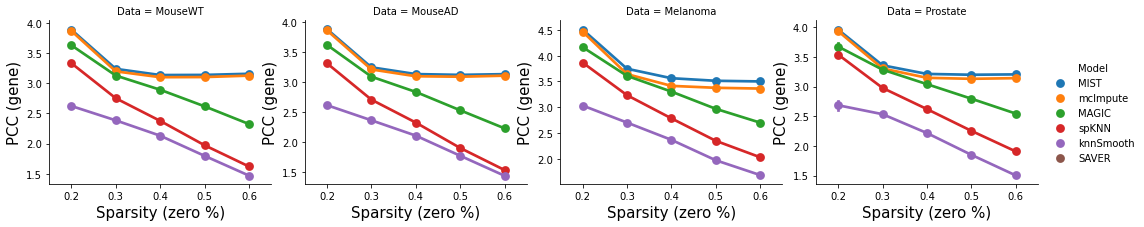

In [9]:
f = plt.figure(figsize=(8,6))
gene_main_plot = sns.catplot(data=gene_perfs, x="MR", y = "SNR", hue="Model",
            linewidth=0.5, hue_order = order_supp,kind="point",
           col="Data", sharey=False, height=3, aspect=1.2, saturation=0.8, width=0.8)

for ax in gene_main_plot.axes.flatten():
    ax.set_ylabel('PCC (gene)', fontsize=15)
    ax.set_xlabel('Sparsity (zero %)', fontsize=15)

#plt.savefig("Figures/ExtFig3-2B.png", dpi=300, bbox_inches="tight")

## Spot level performance by LCN or not

In [70]:
spot_perfs = []
for dn in data_names:
    fn = "%s%s/performance/spot_level_results.csv" %(proj_dir, dn)
    df = pd.read_csv(fn, index_col=0)
    df["data"] = dn
    df["LCN"] = "No"
    for fd in range(5):
        lcn_spots = open("%s%s/LCN_spots_%d.csv" %(proj_dir, dn, fd), "r").readline().split(",")
        df.loc[(df.spot.isin(lcn_spots)) & (df.cvFold == fd), "LCN"] = "Yes"
    spot_perfs.append(df)
spot_perfs = pd.concat(spot_perfs)
spot_perfs.columns = ["spot", "x", "y", "RMSE", "PCC", "SNR", "Model", "cvFold", "Data", "LCN"]

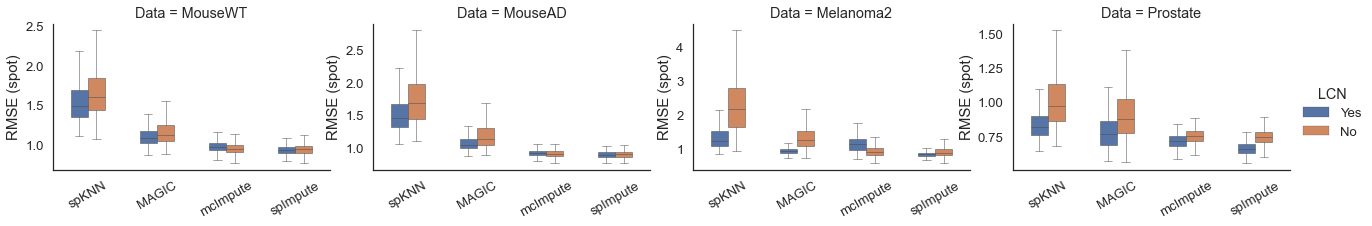

In [93]:
spot_main = sns.catplot(data = spot_perfs,x="Model", y="RMSE", hue="LCN", order = order_main, kind="box",
            showfliers=False, col="Data", sharey=False, height=3, aspect=1.5, saturation=0.8, width=0.5, linewidth=0.5)
for ax in spot_main.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
for ax in spot_main.axes.flatten():
    ax.set_ylabel('RMSE (spot)', fontsize=15)
    ax.set_xlabel('', fontsize=15)
#plt.savefig("Figures/Spot_LCN_yes_no_perf_main.png", dpi=300, bbox_inches="tight")

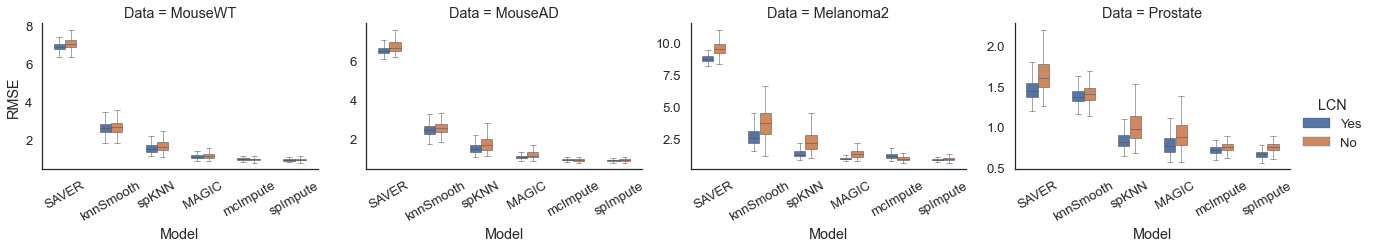

In [99]:
spot_supp = sns.catplot(data = spot_perfs,x="Model", y="RMSE", hue="LCN", order = order_supp, kind="box",
            showfliers=False, col="Data", sharey=False, height=3, aspect=1.5, saturation=0.8, width=0.5, linewidth=0.5)
for ax in spot_supp.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        
for ax in spot_main.axes.flatten():
    ax.set_ylabel('RMSE (spot)', fontsize=15)
    ax.set_xlabel('', fontsize=15)
    
#plt.savefig("Figures/Spot_LCN_yes_no_perf_supp.png", dpi=300, bbox_inches="tight")